In [36]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy
import string
import random
import string
from sklearn import linear_model
import csv
from scipy.sparse import lil_matrix

In [61]:
def readMeta(path):
    with open(path) as f:
        c = csv.reader(f)
        header = next(c)
        for l in c:
            d = dict(zip(header,l))
            yield d['anime_id'],d

In [70]:
metaDict = defaultdict(dict)
metaPath = '../data/anime.csv'
for l in readMeta(metaPath):
    metaDict[l[0]]=l[1]

In [63]:
def readCSV(path):
    with open(path) as f:
        c = csv.reader(f)
        header = next(c)
        for l in c:
            d = dict(zip(header,l))
            yield d['user_id'],d['anime_id'],d['rating'],d

In [71]:
ratingsTrain = []
ratingsValid = []
ratingsTest = []
trainFile='../data/assignment2_train_data'
validFile='../data/assignment2_valid_data'
testFile='../data/assignment2_test_data'
for l in readCSV(trainFile):
    ratingsTrain.append(l)
for l in readCSV(validFile):
    ratingsValid.append(l)
for l in readCSV(testFile):
    ratingsTest.append(l)

In [112]:
popCnt=defaultdict(int)
avgCnt=0
for d in ratingsTrain:
    popCnt[d[1]]=popCnt.get(d[1],0)+1
avgCnt=len(ratingsTrain)/len(popCnt)

In [114]:
popCnt['20583'],avgCnt

(425, 58.884145443839245)

In [115]:
popLog=defaultdict(float)
for d in popCnt:
    popLog[d]=math.log(popCnt[d]/avgCnt)

In [116]:
popLog['20583']

1.9765172920255998

In [65]:
ratingsTrain[:5],ratingsValid[:5],ratingsTest[:5]

([('3940',
   '20583',
   '8',
   {'user_id': '3940', 'anime_id': '20583', 'rating': '8'}),
  ('5688', '99', '6', {'user_id': '5688', 'anime_id': '99', 'rating': '6'}),
  ('5228', '813', '7', {'user_id': '5228', 'anime_id': '813', 'rating': '7'}),
  ('3492',
   '21863',
   '8',
   {'user_id': '3492', 'anime_id': '21863', 'rating': '8'}),
  ('2695', '962', '9', {'user_id': '2695', 'anime_id': '962', 'rating': '9'})],
 [('595',
   '19367',
   '5',
   {'user_id': '595', 'anime_id': '19367', 'rating': '5'}),
  ('2781',
   '2684',
   '7',
   {'user_id': '2781', 'anime_id': '2684', 'rating': '7'}),
  ('4890',
   '1530',
   '10',
   {'user_id': '4890', 'anime_id': '1530', 'rating': '10'}),
  ('3154',
   '18295',
   '8',
   {'user_id': '3154', 'anime_id': '18295', 'rating': '8'}),
  ('1589',
   '12189',
   '9',
   {'user_id': '1589', 'anime_id': '12189', 'rating': '9'})],
 [('525',
   '23755',
   '9',
   {'user_id': '525', 'anime_id': '23755', 'rating': '9'}),
  ('3834',
   '3299',
   '8',
   

In [66]:
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,a,r,d in ratingsTrain:
    r = int(r)
    ratingsPerUser[u].append((a,r))
    ratingsPerItem[a].append((u,r))

In [120]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)
for u,a,r,d in ratingsTrain:
    usersPerItem[a].add(u)
    itemsPerUser[u].add(a)

In [119]:
usersPerItem['11843']

{'1019',
 '1026',
 '1032',
 '1041',
 '1058',
 '1063',
 '1102',
 '1103',
 '1116',
 '1117',
 '1119',
 '1132',
 '1139',
 '1140',
 '1141',
 '1151',
 '1157',
 '1163',
 '1186',
 '1198',
 '1213',
 '1215',
 '1217',
 '1223',
 '123',
 '1237',
 '1244',
 '1273',
 '1302',
 '1306',
 '1310',
 '1313',
 '1324',
 '1335',
 '1339',
 '1366',
 '1372',
 '1378',
 '1395',
 '1425',
 '1429',
 '1435',
 '1438',
 '145',
 '1456',
 '1461',
 '148',
 '1483',
 '1494',
 '1503',
 '1504',
 '1513',
 '152',
 '1520',
 '153',
 '1541',
 '1549',
 '1564',
 '1566',
 '1578',
 '1585',
 '1589',
 '1590',
 '1594',
 '1601',
 '1620',
 '1624',
 '1638',
 '1640',
 '1642',
 '1650',
 '1669',
 '1673',
 '1689',
 '1695',
 '17',
 '1701',
 '1710',
 '1712',
 '1734',
 '1737',
 '1742',
 '1752',
 '1753',
 '1769',
 '1786',
 '1797',
 '1807',
 '1811',
 '1815',
 '1822',
 '1836',
 '1842',
 '1843',
 '1844',
 '1853',
 '1880',
 '1892',
 '1938',
 '1958',
 '1959',
 '1963',
 '1964',
 '1967',
 '1970',
 '2018',
 '2025',
 '2029',
 '2048',
 '2049',
 '2069',
 '2086',

In [41]:
ratingsPerUser['5264']

[('840', 5),
 ('30', 8),
 ('125', 6),
 ('4872', 5),
 ('1311', 7),
 ('3652', 6),
 ('1555', 6),
 ('14131', 5),
 ('6203', 5),
 ('3613', 5),
 ('11759', 5),
 ('7661', 6),
 ('3085', 6),
 ('10172', 6),
 ('330', 7),
 ('24', 8),
 ('4059', 6),
 ('72', 8),
 ('126', 6),
 ('6956', 5),
 ('16067', 6),
 ('4196', 6),
 ('1482', 8),
 ('384', 7),
 ('470', 7),
 ('1813', 6),
 ('10456', 5),
 ('19815', 5),
 ('2605', 5),
 ('1815', 6),
 ('1016', 6),
 ('788', 5),
 ('60', 8),
 ('245', 7),
 ('5079', 5),
 ('6372', 5),
 ('6633', 5),
 ('21085', 6),
 ('3965', 6),
 ('16498', 7),
 ('1956', 7),
 ('12189', 5),
 ('18001', 5),
 ('192', 8),
 ('524', 6),
 ('9656', 6),
 ('431', 6),
 ('2787', 6),
 ('7593', 6),
 ('1535', 8),
 ('2508', 6),
 ('1686', 6),
 ('990', 6),
 ('10178', 6),
 ('1965', 6),
 ('1698', 7),
 ('13161', 6),
 ('268', 9),
 ('6201', 6),
 ('9335', 6),
 ('8231', 5),
 ('12461', 5),
 ('2026', 7),
 ('109', 6),
 ('2580', 6),
 ('382', 7),
 ('6023', 5),
 ('8074', 8),
 ('65', 7),
 ('9289', 6),
 ('221', 6),
 ('272', 7),
 ('609

In [58]:
metaDict['918']

{'anime_id': '918',
 'name': 'Gintama',
 'genre': 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
 'type': 'TV',
 'episodes': '201',
 'rating': '9.04',
 'members': '336376'}

In [77]:
# anime's genre set
animeGenreDict=defaultdict(set)
for a in metaDict:
    animeGenreDict[a]=set(metaDict[a]['genre'].split(', '))
    
# user's genre set and user's type num
userTypeDict=defaultdict(dict)
userGenreDict=defaultdict(set)

for u in ratingsPerUser:
    for a in ratingsPerUser[u]:
        userTypeDict[u][metaDict[a[0]]['type']]=userTypeDict[u].get(metaDict[a[0]]['type'],0)+1
        userGenreDict[u]=userGenreDict[u].union(animeGenreDict[a[0]]) # consider rating weight?

# user's type ratio
for u in userTypeDict:
    for t in userTypeDict[u]:
        userTypeDict[u][t]=userTypeDict[u][t]/len(ratingsPerUser[u])

In [80]:
# user's average rating
avgRatingUser=defaultdict(int)
for u in ratingsPerUser:
    cnt=0
    for a in ratingsPerUser[u]:
        cnt+=a[1]
    avgRatingUser[u]=cnt/len(ratingsPerUser[u])

In [94]:
avgRatingUser['3492']

8.514285714285714

In [95]:
# feature contains: [anime's average rating, members, user's average rating, Jaccard similarity of genre with user, ratio of this type in that user's reviewed animes]
# note that episodes of TV and movies varies a lot, thus we can only consider the difference of the type rather thatn the episodes
# note that all Jaccard data here for each anime comes from the meta data 
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom > 0:
        return numer/denom
    return 0

def feature(Anime,User):
    feat=[]
    feat.append(1)
    
    # anime's average rating
    # print(metaDict[Anime],Anime)
    feat.append(float(metaDict[Anime]['rating']))
    
    # anime's member
    feat.append(int(metaDict[Anime]['members']))
    
    # user's average rating
    feat.append(avgRatingUser[User])
    
    # Jaccard similarity of genre with user
    genreSim=Jaccard(userGenreDict[User],animeGenreDict[Anime])
    feat.append(genreSim)
    
    # ratio of this type in that user's reviewed animes  -- note: for these two, set a rating threshold?
    typeRatio=0
    if metaDict[Anime]['type'] in userTypeDict[User]:
        typeRatio=userTypeDict[User][metaDict[Anime]['type']]
    else:
        typeRatio=0
    feat.append(typeRatio)

    return feat

In [124]:
feature('11843','5264'),feature1('11843','5264')

([1, 8.35, 258914, 6.087171052631579, 0.10256410256410256, 0.631578947368421],
 [1,
  8.35,
  258914,
  6.087171052631579,
  0.10256410256410256,
  0.631578947368421,
  2.096128720512098,
  0.059354471240045316])

In [101]:
ratingsTrain
xTrain=[]
yTrain=[]
xValid=[]
yValid=[]
xTest=[]
yTest=[]
for d in ratingsTrain:
    xTrain.append(feature(d[1],d[0]))
    yTrain.append(float(d[2]))
for d in ratingsValid:
    xValid.append(feature(d[1],d[0]))
    yValid.append(float(d[2]))
for d in ratingsTest:
    xTest.append(feature(d[1],d[0]))
    yTest.append(float(d[2]))

In [103]:
len(xTrain),len(xTest),len(xValid),xTrain[:3]

(400000,
 50000,
 50000,
 [[1,
   8.68,
   284498,
   8.766129032258064,
   0.16129032258064516,
   0.8064516129032258],
  [1, 7.4, 36924, 7.317829457364341, 0.10810810810810811, 0.6666666666666666],
  [1,
   8.32,
   375662,
   7.651408450704225,
   0.19444444444444445,
   0.7535211267605634]])

In [104]:
mod = linear_model.LinearRegression()

In [178]:
mod.fit(xTrain, yTrain)

LinearRegression()

In [179]:
mod.intercept_,mod.coef_

(-6.761306923447726,
 array([ 0.00000000e+00,  9.30907025e-01, -1.30835473e-07,  9.69475835e-01,
        -6.31370054e-01, -9.47717703e-02]))

In [106]:
pred = mod.predict(xValid)

In [109]:
sum([x**2 for x in (yValid - pred)]) / len(yValid)

1.545511554921678

In [110]:
pred_test = mod.predict(xTest)

In [111]:
sum([x**2 for x in (yTest - pred_test)]) / len(yTest)

1.5424343492943953

In [135]:
# feature with two more interaction datas: the popularity of items(log(cnt/avgCnt)), the Jaccard similarity of item with itemsPerUser
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom > 0:
        return numer/denom
    return 0

def feature1(Anime,User):
    feat=[]
    feat.append(1)
    
    # anime's average rating
    # print(metaDict[Anime],Anime)
    feat.append(float(metaDict[Anime]['rating']))
    
    # anime's member
    feat.append(int(metaDict[Anime]['members']))
    
    # user's average rating
    feat.append(avgRatingUser[User])
    
    # Jaccard similarity of genre with user
    genreSim=Jaccard(userGenreDict[User],animeGenreDict[Anime])
    feat.append(genreSim)
    
    # ratio of this type in that user's reviewed animes  -- note: for these two, set a rating threshold?
    typeRatio=0
    if metaDict[Anime]['type'] in userTypeDict[User]:
        typeRatio=userTypeDict[User][metaDict[Anime]['type']]
    else:
        typeRatio=0
    feat.append(typeRatio)
    
    # the popularity of items(log(cnt/avgCnt)
    popf=0
    if Anime in popLog:
        popf=popLog[Anime]
    else:
        popf=0
    feat.append(popf)
    
    # the Jaccard similarity of item with itemsPerUser
    jacSum=0
    jacCnt=0
    for a in itemsPerUser[User]:
        jacSum+=Jaccard(usersPerItem[a],usersPerItem[Anime])
    if jacSum>0:
        jacCnt=jacSum/len(itemsPerUser[User])
    feat.append(jacCnt)

    return feat

In [131]:
xTrain1=[]
yTrain1=[]

for d in ratingsTrain:
    xTrain1.append(feature1(d[1],d[0]))
    yTrain1.append(float(d[2]))

ZeroDivisionError: division by zero

In [156]:
xValid1=[]
yValid1=[]
xTest1=[]
yTest1=[]
for d in ratingsValid:
    xValid1.append(feature1(d[1],d[0]))
    yValid1.append(float(d[2]))
for d in ratingsTest:
    xTest1.append(feature1(d[1],d[0]))
    yTest1.append(float(d[2]))

In [157]:
len(xTrain1),len(ratingsTrain),len(xValid1),len(ratingsValid),len(xTest1),len(ratingsTest)

(400000, 400000, 50000, 50000, 50000, 50000)

In [187]:
mod.fit(xTrain1, yTrain1)

LinearRegression()

In [188]:
mod.intercept_,mod.coef_

(-6.963651842943794,
 array([ 0.00000000e+00,  9.53951448e-01,  9.64734029e-08,  9.72760398e-01,
        -4.67760854e-01, -5.83996022e-02, -5.10344683e-02, -2.55899952e-01]))

0 0.9539514478159077
1 9.647340293295059e-08
2 0.9727603984414355
3 0.4677608543435483
4 0.058399602151746284
5 0.051034468334426965
6 0.25589995199667914


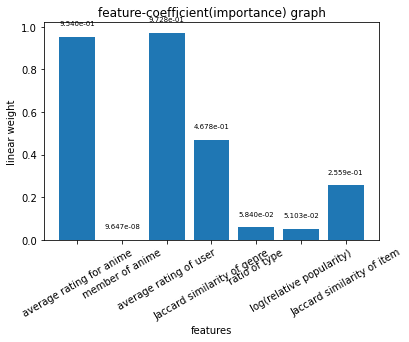

In [253]:
import matplotlib.pyplot as plt
 
name_list = ['average rating for anime','member of anime','average rating of user','Jaccard similarity of genre','ratio of type','log(relative popularity)','Jaccard similarity of item']
num_list = [i for i in range(7)]
y_list = []
for val in mod.coef_[1:]:
    y_list.append(abs(val))
plt.bar(range(len(num_list)), y_list,tick_label=name_list)
plt.xticks(rotation=30)
plt.xlabel('features')

plt.ylabel('linear weight')

plt.title('feature-coefficient(importance) graph')

for a,b in zip(num_list,y_list):
    print(a,b)

    plt.text(a, b+0.05, '%.3e' % b, ha='center', va= 'bottom',fontsize=7)

plt.show()

In [190]:
type(mod.coef_),type(mod.intercept_)

(numpy.ndarray, numpy.float64)

In [191]:
para=mod.coef_[1:]

In [213]:
df=pd.DataFrame(para)

In [217]:
df=df.rename(columns={0:'val'})

In [218]:
df

,val
0,9.539514e-01
1,9.647340e-08
2,9.727604e-01
3,-4.677609e-01
4,-5.839960e-02
5,-5.103447e-02
6,-2.559000e-01


In [219]:
df.insert(df.shape[1],'new',['average rating for anime','member of anime','average rating of user','Jaccard similarity of genre with user','ratio of type in user','popularity of items(log(cnt/avgCnt)','Jaccard similarity of item with itemsPerUser'])

In [220]:
ppv3=df.set_index('new').rename_axis(None)

In [221]:
ppv3,len(ppv3.index)

(                                                       val
 average rating for anime                      9.539514e-01
 member of anime                               9.647340e-08
 average rating of user                        9.727604e-01
 Jaccard similarity of genre with user        -4.677609e-01
 ratio of type in user                        -5.839960e-02
 popularity of items(log(cnt/avgCnt)          -5.103447e-02
 Jaccard similarity of item with itemsPerUser -2.559000e-01,
 7)

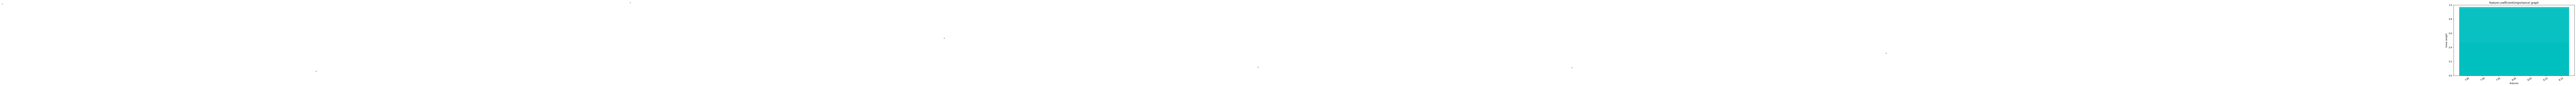

In [235]:
plt.figure(figsize=(10,6))

#设置x轴柱子的个数

x=len(ppv3.index)+1 #课程品类数量已知为14，也可以用len(ppv3.index)

#设置y轴的数值，需将numbers列的数据先转化为数列，再转化为矩阵格式

y=np.array(list(ppv3['val']))
for i in range(len(y)):
    y[i]=abs(y[i])
xticks1=list(ppv3.index) #构造不同课程类目的数列

#画出柱状图

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

#设置x轴的刻度，将构建的xticks代入，同时由于课程类目文字较多，在一块会比较拥挤和重叠，因此设置字体和对齐方式
# print(x,xticks1)
# plt.xticks(x,xticks1,size='small',rotation=30)
plt.xticks(rotation=30)
#x、y轴标签与图形标题

plt.xlabel('features')

plt.ylabel('linear weight')

plt.title('feature-coefficient(importance) graph')

#设置数字标签
x1=[i for i in range(7)]
# print(x1,y)
for a,b in zip(x1,y):

    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

#设置y轴的范围

plt.ylim(0,1)

plt.show()

In [228]:
pred1 = mod.predict(xValid1)

In [160]:
sum([x**2 for x in (yValid1 - pred1)]) / len(yValid1)

1.544886777523327

In [161]:
pred_test1 = mod.predict(xTest1)

In [162]:
sum([x**2 for x in (yTest1 - pred_test1)]) / len(yTest1)

1.5412400322714497

In [166]:
[1]+xTrain1[1][6:]

[1, 0.3552449219444966, 0.051451783334412554]

In [167]:
# only interaction: the popularity of items(log(cnt/avgCnt)), the Jaccard similarity of item with itemsPerUser
xTrain2=[]
xValid2=[]
xTest2=[]
for x in xTrain1:
    xTrain2.append([1]+x[6:])
for x in xValid1:
    xValid2.append([1]+x[6:])
for x in xTest1:
    xTest2.append([1]+x[6:])

In [168]:
xTrain2[:2]

[[1, 1.9765172920255998, 0.11900393218996842],
 [1, 0.3552449219444966, 0.051451783334412554]]

In [170]:
mod.fit(xTrain2, yTrain1)
pred2 = mod.predict(xValid2)

In [171]:
sum([x**2 for x in (yValid1 - pred2)]) / len(yValid1)

2.2658727839667963

In [172]:
pred_test2 = mod.predict(xTest2)

In [173]:
sum([x**2 for x in (yTest1 - pred_test2)]) / len(yTest1)

2.2838106092328747

In [175]:
mod.intercept_,mod.coef_

(7.277919819343054, array([0.        , 0.22868183, 2.72209296]))

In [182]:
# anime's avg rating, user's avg rating, pop, jaccard
xTrain3=[]
xValid3=[]
xTest3=[]
for x in xTrain1:
    xTrain3.append([1]+[x[1]]+[x[3]]+x[6:])
for x in xValid1:
    xValid3.append([1]+[x[1]]+[x[3]]+x[6:])
for x in xTest1:
    xTest3.append([1]+[x[1]]+[x[3]]+x[6:])

In [183]:
mod.fit(xTrain3, yTrain1)
pred3 = mod.predict(xValid3)
pred_test3 = mod.predict(xTest3)

In [184]:
sum([x**2 for x in (yValid1 - pred3)]) / len(yValid1)

1.5470347224808991

In [185]:
sum([x**2 for x in (yTest1 - pred_test3)]) / len(yTest1)

1.5426688776527433